In [3]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import time
import re
import random
from keras import regularizers


# Initialisation du générateur de nombres aléatoires
random.seed(123)

tokenizer = nltk.RegexpTokenizer(r'''\w'|\w+|[^\w\s]''')

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [4]:
import nltk

# Télécharge les données nécessaires pour le tokenizer (segmenteur) de phrases et de mots
nltk.download('punkt')

# Télécharge la liste de mots vides (stopwords) pour différentes langues
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
train_data = pd.read_csv('cleaned_data/train_cleaned.csv',index_col=0)
dev_data   = pd.read_csv('cleaned_data/dev_cleaned.csv',index_col=0)
test_data  =  pd.read_csv('cleaned_data/test_cleaned.csv',index_col=0)

In [4]:
# GET ONLY 1/4 OF TRAIN AND DEV DATA DUE TO COMPUTATION RESOURCES LIMITATIONS
# train_data = train_data.head(200)
# dev_data = dev_data.head(50)


In [6]:
train_data

,movie,review_id,name,user_id,note,commentaire
0,229864,review_58145147,AM11,Z20051105131449940367618,7,trouve face tient côté cette phrase tagline fi...
1,229864,review_59303833,this is my movies,Z20051220181957240298347,6,soi rien contre genre récit hyper codifié déjà...
2,229864,review_61916672,Shephard69,Z20121226180301760912584,8,troisième réalisation après tron héritage obli...
3,229864,review_1000190786,Tayop,Z20121022182542230468657,5,joseph kosinski offre nouvelles images ébourif...
4,229864,review_59207755,ned123,Z20061211223247607682175,6,film traite drame humain plus haute intensité ...
...,...,...,...,...,...,...
665957,245551,review_55820729,Wally L,Z20121109004006553333277,7,super realisation quelques bon acteurs cette v...
665958,245551,review_1001840194,r@ch,Z20100726110927837577369,5,film visuellement très beau mis musique rap am...
665959,245551,review_56242470,Kaiser D.,Z20170721223303710182536,6,parti histoire parait banale très bon film tou...
665960,245551,review_58174196,Florent A.,Z20161204004443590736237,5,mitigé film coté plutot accroché peu mal aise ...


In [7]:
type(train_data['commentaire'][0])

str

In [8]:
train_data['commentaire'] = train_data['commentaire'].astype(str)
dev_data['commentaire'] = dev_data['commentaire'].astype(str)
test_data['commentaire'] = test_data['commentaire'].astype(str)

In [9]:
train_comments_list = train_data['commentaire'].values.tolist()
dev_comments_list  = dev_data['commentaire'].values.tolist()
test_comments_list  = test_data['commentaire'].values.tolist()

In [10]:
corpus_all_comments = train_comments_list + dev_comments_list + test_comments_list

In [11]:
corpus_all_comments

['trouve face tient côté cette phrase tagline film veut tout dire résume parfaitement premier film science fiction joseph kosinski intéresse pompiers élite tant professionnels surtout tant hommes dresse très beau portrait bande potes prêts tout sacrifier protéger environnement flammes film davantage centré quotidien héros font face nombreux dilemmes cela empêche scènes terrain aussi superbes terribles surtout vraiment impressionnantes comme témoigne notamment cet excellent final histoire inspirée faits réels donc connaissez mieux premier temps découvrir travers film expérience bien plus forte efficace très bon film histoire puissante pleine humanité traitement sobre très juste puisque jamais forcé tandis plan technique très solide scènes grand réalisme somme très beau divertissement',
 'soi rien contre genre récit hyper codifié déjà mille fois mérite intéresser corps métier peu montré cinéma séries bien sûr droit tous poncifs genre dialogues sans surprise situations connaît coeur émane

# Corpus Tokenization

In [11]:
from nltk.tokenize import word_tokenize

tokens = [word_tokenize(sentence) for sentence in corpus_all_comments]
tokens

[['trouve',
  'face',
  'tient',
  'côté',
  'cette',
  'phrase',
  'tagline',
  'film',
  'veut',
  'tout',
  'dire',
  'résume',
  'parfaitement',
  'premier',
  'film',
  'science',
  'fiction',
  'joseph',
  'kosinski',
  'intéresse',
  'pompiers',
  'élite',
  'tant',
  'professionnels',
  'surtout',
  'tant',
  'hommes',
  'dresse',
  'très',
  'beau',
  'portrait',
  'bande',
  'potes',
  'prêts',
  'tout',
  'sacrifier',
  'protéger',
  'environnement',
  'flammes',
  'film',
  'davantage',
  'centré',
  'quotidien',
  'héros',
  'font',
  'face',
  'nombreux',
  'dilemmes',
  'cela',
  'empêche',
  'scènes',
  'terrain',
  'aussi',
  'superbes',
  'terribles',
  'surtout',
  'vraiment',
  'impressionnantes',
  'comme',
  'témoigne',
  'notamment',
  'cet',
  'excellent',
  'final',
  'histoire',
  'inspirée',
  'faits',
  'réels',
  'donc',
  'connaissez',
  'mieux',
  'premier',
  'temps',
  'découvrir',
  'travers',
  'film',
  'expérience',
  'bien',
  'plus',
  'forte',
  

# W2V_Skip-gram

In [12]:
#  objectif : Prédire le contexte (les mots qui entourent) à partir d'un mot cible.
#  Utilisation : Performant pour des corpus textuels où le sens des mots est relativement stable sur de courtes fenêtres.

In [13]:
# from gensim.models import Word2Vec

# # Modèle Word2Vec avec Skip-gram
# Word2Vec_model_skipgram = Word2Vec(sentences=tokens, vector_size=100, window=5, sg=1, min_count=1, epochs=10)

# # Sauvegarde du modèle
# Word2Vec_model_skipgram.save("Word2Vec_Skipgram.model")


In [17]:
#!pip install gensim

# W2V_CBOW

In [18]:
#  Prédire un mot cible à partir de son contexte (les mots qui l'entourent).
#  Utilisation : Performant pour des corpus textuels où le sens des mots est relativement stable sur de courtes fenêtres. 

In [19]:
from gensim.models import Word2Vec

Word2Vec_model_cbow = Word2Vec(tokens, vector_size=100, min_count=1, epochs=10, sg=0)

Word2Vec_model_cbow.save("Word2Vec_CBOW.model")

In [20]:
Word2Vec_CBOW = Word2Vec.load("Word2Vec_CBOW.model")

In [21]:
vector = Word2Vec_CBOW.wv['film']  # get numpy vector of a 'film' word
vector

array([ 1.5934916e+00, -1.4948337e-01,  1.3660426e+00, -8.5521883e-01,
       -5.8033228e-01, -2.5038829e-01,  3.9489846e+00, -5.2068192e-01,
       -2.4794172e-01,  1.1157120e+00,  2.7142162e+00,  4.5300841e+00,
        3.2812294e-01, -8.2900339e-01, -6.7965245e-01,  1.0473979e+00,
       -6.5489942e-01,  1.2260090e+00, -1.1674485e+00,  3.0165305e+00,
        1.2667007e+00,  1.2246324e+00,  4.2776719e-01, -1.2284019e+00,
        1.1741183e+00, -1.7599611e+00, -1.6497105e+00,  2.6314144e+00,
       -1.6213151e+00, -1.4424740e-01, -8.4131491e-01, -2.0715446e+00,
        1.7644745e+00, -1.2045163e-01, -1.7126456e+00,  2.1155694e+00,
       -3.1279799e-01, -4.6790349e-01, -2.4124198e-03, -1.3542601e-01,
       -3.1006665e+00,  1.5938749e+00, -7.5724256e-01,  6.3956475e-01,
        5.3901607e-03,  3.9180746e+00,  9.1690058e-01,  1.3440853e+00,
        7.2634315e-01, -1.2495368e+00, -3.2039148e-01,  2.2590628e+00,
        1.6251557e+00, -2.3796747e+00,  3.1264517e+00, -2.7531152e+00,
      

In [12]:
def limit_comment_length(comment, max_words=100):
    # Diviser le commentaire en mots
    words = comment.split()
    
    # Limiter le nombre de mots
    limited_words = words[:max_words]
    
    # Rejoindre les mots pour former un nouveau commentaire
    limited_comment = ' '.join(limited_words)
    
    return limited_comment

# Appliquer la fonction à chaque commentaire dans train_comments_list et dev_comments_list
train_list = [limit_comment_length(comment) for comment in train_comments_list if comment]
dev_list = [limit_comment_length(comment) for comment in dev_comments_list if comment]


In [13]:
def count_words(message):
    # Diviser la chaîne en une liste de mots
    words = message.split()
    
    # Compter le nombre de mots
    num_words = len(words)
    
    return num_words

# Exemple d'utilisation
result = count_words(train_list[0])

print("Nombre de mots dans le message :", result)


Nombre de mots dans le message : 100


In [14]:
train_data['nouvelle commentaire'] = train_list
dev_data['nouvelle commentaire']   = dev_list

In [15]:
train_data['nouvelle commentaire']

0         trouve face tient côté cette phrase tagline fi...
1         soi rien contre genre récit hyper codifié déjà...
2         troisième réalisation après tron héritage obli...
3         joseph kosinski offre nouvelles images ébourif...
4         film traite drame humain plus haute intensité ...
                                ...                        
665957    super realisation quelques bon acteurs cette v...
665958    film visuellement très beau mis musique rap am...
665959    parti histoire parait banale très bon film tou...
665960    mitigé film coté plutot accroché peu mal aise ...
665961    bon film netflix fois scénario simple acteurs ...
Name: nouvelle commentaire, Length: 665962, dtype: object

In [26]:
# train data sise : 665962

In [16]:
X_train = train_data['nouvelle commentaire']
X_dev   = dev_data['nouvelle commentaire']

# return the most 'len(X_train) = 665962' frequent words id
tokenizer = Tokenizer(num_words=len(list(X_train.unique())))

# entrainer le tokenizer
tokenizer.fit_on_texts(list(X_train))

#mapping of words to ids for the entire text corpus
word_index = tokenizer.word_index

# Return a vector of ids of the most 'len(X_train) = 665962' in each comment
X_train = tokenizer.texts_to_sequences(X_train) 
X_dev = tokenizer.texts_to_sequences(X_dev)

# Ensure that all sequences in a list have the same length, if not add 0 at begining
X_train = pad_sequences(X_train, maxlen=100)
X_dev = pad_sequences(X_dev, maxlen=100)

In [28]:
word_index

{'film': 1,
 'très': 2,
 'bien': 3,
 'plus': 4,
 'tout': 5,
 'bon': 6,
 'peu': 7,
 'histoire': 8,
 'fait': 9,
 'sans': 10,
 'comme': 11,
 'voir': 12,
 'cette': 13,
 'acteurs': 14,
 'scénario': 15,
 'être': 16,
 'trop': 17,
 'vraiment': 18,
 'aussi': 19,
 'faire': 20,
 'fin': 21,
 'peut': 22,
 'assez': 23,
 'personnages': 24,
 'beaucoup': 25,
 'rien': 26,
 'scènes': 27,
 'scène': 28,
 'moment': 29,
 'reste': 30,
 'deux': 31,
 'mal': 32,
 'fois': 33,
 'films': 34,
 'grand': 35,
 'entre': 36,
 'tous': 37,
 'car': 38,
 'quelques': 39,
 'quand': 40,
 'action': 41,
 'moins': 42,
 'toujours': 43,
 'encore': 44,
 'après': 45,
 'bonne': 46,
 'cela': 47,
 'cinéma': 48,
 'temps': 49,
 'plutôt': 50,
 'donc': 51,
 'humour': 52,
 'vie': 53,
 'comédie': 54,
 'premier': 55,
 'surtout': 56,
 'dire': 57,
 'rôle': 58,
 'personnage': 59,
 'long': 60,
 'genre': 61,
 'alors': 62,
 'autres': 63,
 'non': 64,
 'réalisateur': 65,
 'mise': 66,
 'avoir': 67,
 'belle': 68,
 'malgré': 69,
 'monde': 70,
 'juste': 71

In [29]:
X_train

array([[ 124,  268,  232, ...,  976,    2, 1350],
       [ 815,   26,  144, ..., 9741, 1952, 5437],
       [ 625,   90,   45, ..., 1203,   66,   28],
       ...,
       [   0,    0,    0, ...,   35,  299, 2314],
       [   0,    0,    0, ...,   39,  306,  440],
       [   0,    0,    0, ...,  294,    6,    1]], dtype=int32)

In [30]:
vocab_size = len(word_index) + 1
vocab_size

204672

In [31]:
import numpy as np

# Return a matix of vocab words embedding based using Word2Vec_CBOW 
def create_embedding_matrix(tokenizer, word2vec_model, embedding_dim):
    vocab_size = len(tokenizer.word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, i in tokenizer.word_index.items():
        try:
            vector = word2vec_model.wv[word]
        except KeyError:
            # Word not found in Word2Vec, keep the embedding as zeros
            continue
        embedding_matrix[i] = vector

    return embedding_matrix

In [32]:
embedding_matrix = create_embedding_matrix(tokenizer, Word2Vec_CBOW, 100)
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.59349155, -0.14948337,  1.36604261, ..., -0.36034399,
         0.01474811, -1.43851054],
       [ 0.28430983,  0.13334253, -0.09100309, ...,  0.96768522,
        -0.43260926,  0.89435565],
       ...,
       [ 0.09168132,  0.07556436,  0.06824547, ...,  0.01637535,
         0.02666489, -0.06498063],
       [ 0.04524687, -0.03462879,  0.01485834, ..., -0.03426669,
        -0.01305554,  0.01177113],
       [ 0.05522208, -0.02292765,  0.02462754, ..., -0.02872406,
        -0.04477957,  0.06618378]])

In [33]:
y_train = np.array(train_data['note'])
y_train = y_train.astype(int)
y_train

array([7, 6, 8, ..., 6, 5, 6])

In [34]:
y_dev = np.array(dev_data['note'])
y_dev = y_dev.astype(int)
y_dev

array([9, 6, 7, ..., 7, 0, 0])

# CNN + Word2Vec_CBOW

In [35]:
classes_num = 10

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, GlobalMaxPool1D

dropout_rate=0.25

# Create a sequential model
model = Sequential()

# Add an Embedding layer to the model
model.add(Embedding(
    input_dim=vocab_size,         # Vocabulary size, total number of unique words in the data
    output_dim=100,               # Dimension of the embedding space, each word represented by a vector of 100 dimensions
    input_length=100,             # Length of each input sequence (comment), limited to 100 words
    weights=[embedding_matrix],   # Initialize the embedding layer with pre-trained weights from embedding_matrix
    trainable=True                # Allow the weights of the embedding layer to be trainable during model training
))

model.add(Conv1D(filters=128, kernel_size=5, activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(BatchNormalization())
model.add(GlobalMaxPool1D())
model.add(Dropout(dropout_rate))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(dropout_rate))
model.add(Dense(10, activation='softmax'))

# Compile the model
#  sparse_categorical_crossentropy loss function used during training. For a classification task with integer labels (like 0, 1, 2),
# for that i converted nmarks from 0.5,1...5 to 0,1...9
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()




# Specify the file path where the best model will be saved
filepath = 'CNN_Word2Vec_SkipGram_Best_One.hdf5'

# Create callbacks
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    restore_best_weights=True
)

callbacks = [checkpoint, early_stopping]

start_time = time.time()


# Train for more epochs
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_dev, y_dev),
    epochs=7,  # Increase the number of epochs
    batch_size=128,  # Experiment with different batch sizes
    verbose=1,
    callbacks=callbacks
)

execution_time = time.time() - start_time

print('Execution time:', time.strftime("%H:%M:%S", time.gmtime(execution_time)))




2024-01-03 22:49:51.536343: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          20467200  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           64128     
                                                                 
 batch_normalization (Batch  (None, 96, 128)           512       
 Normalization)                                                  
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5203/5203 [==============================] - 1543s 295ms/step - loss: 1.8752 - accuracy: 0.3289 - val_loss: 1.7034 - val_accuracy: 0.3663
Epoch 2/7
5203/5203 [==============================] - ETA: 0s - loss: 1.7344 - accuracy: 0.3579
Epoch 2: val_accuracy improved from 0.36627 to 0.37348, saving model to CNN_Word2Vec_SkipGram_Best_One.hdf5
5203/5203 [==============================] - 1545s 297ms/step - loss: 1.7344 - accuracy: 0.3579 - val_loss: 1.6932 - val_accuracy: 0.3735
Epoch 3/7
5203/5203 [==============================] - ETA: 0s - loss: 1.7106 - accuracy: 0.3656
Epoch 3: val_accuracy improved from 0.37348 to 0.37636, saving model to CNN_Word2Vec_SkipGram_Best_One.hdf5
5203/5203 [==============================] - 1521s 292ms/step - loss: 1.7106 - accuracy: 0.3656 - val_loss: 1.6921 - val_accuracy: 0.3764
Epoch 4/7
5203/5203 [==============================] - ETA: 0s - loss: 1.6953 - accuracy: 0.3713
Epoch 4: val_accuracy did not improve from 0.37636
5203/5203 [=================

# save train and validation accuracy/loss

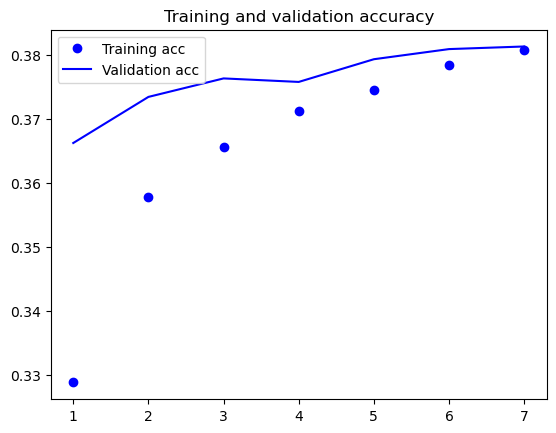

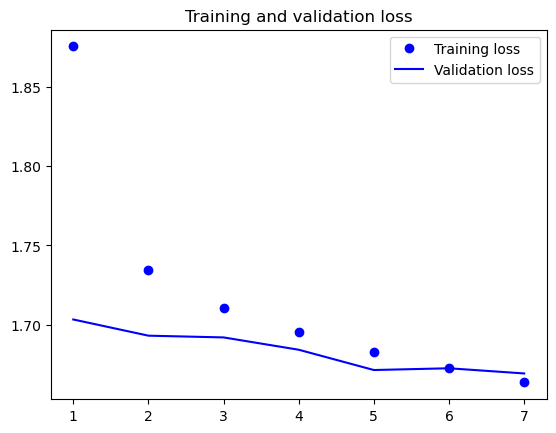

In [37]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Cnn_accuracy_plot.png')  # Save the plot as an image

# Clear the figure for the next plot
plt.figure()

# Plot loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('Cnn_loss_plot.png')  # Save the plot as an image


# Test and saving predictions

In [1]:
from tensorflow.keras.models import load_model

# model = load_model('MLP_Best_One.hdf5'),this command doesn't work for me, i had to change the saved model path

modelpath = "C:/trained_Models/CNN_Word2Vec_SkipGram_Best_One.hdf5"

# Load the model with compile=False
CNN_Word2Vec_SkipGram_Best_One = load_model(modelpath)


In [39]:
# model

In [17]:
test_data['commentaire'] = test_data['commentaire'].astype(str)
X_test = test_data['commentaire']

In [18]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=100)

In [19]:
predictions = CNN_Word2Vec_SkipGram_Best_One.predict(X_test)
predictions

2683/2683 [==============================] - 16s 6ms/step


array([[8.9702748e-02, 5.5629265e-02, 3.2546833e-02, ..., 2.5435522e-01,
        1.3037741e-01, 1.4842311e-01],
       [2.7104178e-03, 4.0183831e-03, 4.9223229e-03, ..., 3.5166216e-01,
        1.2891464e-01, 1.0746263e-01],
       [2.6368573e-03, 2.7255618e-03, 2.9530036e-03, ..., 3.0980065e-01,
        2.0002529e-01, 2.7222094e-01],
       ...,
       [1.0057070e-04, 2.7313532e-04, 3.5628930e-04, ..., 4.6609074e-01,
        8.9075208e-02, 3.1072974e-02],
       [1.1915989e-03, 1.1876825e-03, 1.1948455e-03, ..., 3.5716978e-01,
        1.9922782e-01, 2.2822191e-01],
       [9.8316756e-04, 1.0326911e-03, 1.1230439e-03, ..., 3.0827287e-01,
        2.4095570e-01, 2.8476599e-01]], dtype=float32)

In [20]:
argmax_predictions = np.argmax(predictions,axis =1)
argmax_predictions

array([7, 7, 7, ..., 7, 7, 7], dtype=int64)

In [21]:
#  generate the plateform test data format        
with open("CNN_Word2Vec_SkipGram_ID_Prediction.txt", "w") as f:
    for i in range(len(test_data['review_id'])):
        prediction = (argmax_predictions[i] + 1) / 2
        line = f"{test_data['review_id'].iloc[i]} {str(prediction).replace('.', ',')}\n"
        f.write(line)